# **Exploratory Data Analysis : Evaluasi Penggunaan Diskon dalam Penjualan Produk SaaS dari Amazon Web Service (AWS)**

Oleh : Ian Arif Rahman

_____________________________________________________________________________________


### **Background**

Faktor pertama dan yang paling umum tentang diskon di industri SaaS adalah keyakinan bahwa diskon dapat memenangkan *dealing*. Tim Sales dari SaaS biasanya berargumen bahwa diskon yang lebih tinggi sangat penting untuk memenangkan kesepakatan. Tetapi apakah benar demikian? Penelitian terbaru di berbagai perusahaan SaaS secara konsisten menunjukkan hal yang sebaliknya (sumber: [taylorwells.com.au/b2b-saas-pricing-models](https://taylorwells.com.au/b2b-saas-pricing-models/)). Disamping itu, diskon besar yang tidak tepat guna hanya akan memangkas margin perusahaan sehingga mengganggu *Growth* dari perusahaan, tetapi jika benar-benar dihilangkanpun akan membuat penjualan menurun. Ini seperti pedang bermata dua dan pengalokasian diskon secara proporsinal dan tepat menjadi penting.

Oleh karena hal itu, secara khusus dari divisi Sales AWS SaaS meminta tim *data Analyst* untuk mengevaluasi **penggunaan diskon pada sales 4 tahun terakhir (2020-2023) untuk segmen SaaS** untuk dipelajari agar bisa meningkatkan margin
 perusahaan ditahun-tahun kedepan.

_____________________________________________________________________________________


### **Business Problem**

Untuk menjawab pertanyaan besar, **Sudah tepatkah penggunaan discount pada data penjualan Amazon Web Service platform SaaS diperiode 2020-2023?**, kita bisa mulai dari point-point pertanyaan yang harus dijawab diantaranya :

1. *Sebutkan 3 persentase diskon yang sering digunakan? Berapa prosentase transaksi yang tidak menggunakan discount?*

1.   Kapan waktu terbaik mengeluarkan discount menurut tanggal, bulan, & tahun?

2. Siapakah customer yang jarang dan sering menggunakan discount? Berapa spanding discount yang dikeluarkan untuk mereka?

2. Apa Product, industry & Segment yang paling resistence dan tidak dengan discount? berapa spanding discount untuk pdoduct tersebut?



_____________________________________________________________________________________


## **Batasan Masalah**

1.   Dataset yang digunakan hanya dalam rentang waktu **2020-2023**
2.   Analisa hanya melibatkan Data **Sales, Quantity, dan Discount** tidak sampai perhitungan **profitability**
3. Tidak melibatkan data geografis seperti **kota, negara, subregion dan region**







_____________________________________________________________________________________

## **0. Persiapan Data**

**0-1. Import Package**
  
  Kita akan mulai dari import library yang dibutuhkan dalam analisa ini, diantara lain sebagai berikut :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('white')
sns.set_palette('Oranges_r')
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

**0-2. Dataset**

Dataset yang akan digunakan dalam Exploratory Data Analysis ini bersumber dari [kaggle.com](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales). Terdiri dari 1 file yang berformat *comma-separated values (.csv)*.

Dataset ini berisi data transaksi dari perusahaan SaaS fiktif yang menjual software Sales & Marketing ke perusahaan lain (B2B). Dalam dataset ini, setiap baris mewakili sebuah produk dalam sebuah transaksi,
dan kolom-kolomnya meliputi :

1. **Row ID**: *Kolom ID*
2. **Order ID**: *Kode Unik untuk setiap transaksi*
3. **Order Date**: *Tanggal Pemesanan*
4. **Date Key**: *Nomor yang merepresentasikan tanggal order(YYYYMMDD)*
5. **Contact Name**: *Nama PIC yang memesan*
6. **Country**: *Negara tempat memesan oleh customer*
7. **City**: *Kota tempat pemesanan oleh customer*
8. **Region**: *Region tempat pemesanan oleh customer*
9. **Subregion**: *Subregion tempat pemesanan oleh customer*
10. **Customer**: *Nama perusahaan sebagai customer*
11. **Customer ID**: *Kode unik perusahaan sebagai customer*
12. **Industry**: *bidang industri dari customer*
13. **Segment**: *Segmentasi customer (SMB, Strategic, Enterprise, etc.)*
14. **Product**: *Produk yang dibeli*
15. **License**: *Kode lisensi produk*
16. **Sales**: *Nominal transaksi penjualan*
17. **Quantity**: *Jumlah item penjualan*
18. **Discount**: *Diskon dari transaksi*
19. **Profit**: *Profit dari transaksi*

In [2]:
# Loading Data
df = pd.read_csv('/content/drive/MyDrive/PURWADHIKA/Capstone2/SaaS-Sales.csv')
df.head(3)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.62,2,0.0,6.8714


In [3]:
# Menghapus Kolom
df.drop(['Row ID','Date Key','Customer ID','Contact Name','Country','City','Region','Subregion','License','Profit'],axis=1,inplace=True)


Dari dataset ini ada beberapa kolom yang dihapus karena beberapa alasan, antara lain :


*   **Row ID** : Merupakan angka yang hanya merepresentasikan urutan table
*   **Date Key** : Kode angka yang merepresentasikan tanggal transaksi. Dihapus karena sudah diwakili oleh kolom **Order Date**
*   **Customer ID** : Merupakan kode unik dari customer. Dihapus karena sudah diwakili oleh kolom **Customer** dan tidak merepresentasikan hal lain

*   **Contact Name** : Data dibuang karena tidak dibutuhkan untuk analisa
*   **City, Country, Subregion, Region** : Dibuang karena pembatasan masalah

*   **License** : Merupakan kode unik yang tidak terduplikasi dalam 1 dataset dan tidak merepresentasikan hal lain

*   **Profit** : Kolom profit tidak diperlukan karena analisa tidak sampai ke profitability dan margin







In [4]:
# cek type data waktu
df['Order Date'].dtypes

dtype('O')

In [5]:
# Merubah type data 'Order Date'
df['Order Date']=df['Order Date'].apply(pd.to_datetime)
df['Order Date'].dtypes

# memecah order date menjadi 3 kolom 'Day','Month',& 'Year'
df['Day'] = df['Order Date'].dt.day
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Menghapus kolom 'Order Date'
df.drop(['Order Date'],axis=1,inplace=True)

Sebelumnya kolom **Order Date** bertype ***Object*** lalu kita rubah ke ***datetime*** supaya bisa dipecah menjadi *'Day','Month'&'Year'* untuk kebutuhan analisis berikutnya dan juga melakukan drop kolom Order Date karena setelah dipecah, maka sudah tidak diperlukan lagi

In [6]:
# Tambah Kolom Total_Revenue & Cost_Discount
df['Total_Revenue'] = df['Sales']*df['Quantity'] # Add kolom Gross Sales
df['Cost_Discount'] = df['Total_Revenue']*df['Discount'] # Add kolom Cost_Discount

Ditambahkan kolom baru yaitu **Total_Revenue** dan **Cost_Discount**  untuk keperluan analisis. Menurut sumber dari [accurate.id](https://accurate.id/akuntansi/gross-sales/), kita bisa mendapatkan kolom tersebut dari perhitungan matematika dengan kolom yang sudah ada. Diantaranya :

                                  Total_Revenue = Sales x Quantity
                                  Cost_Discount = Total_Revenue x Discount

In [7]:
# Membuat fungsi Quarter
def Quartal(x):
  if x < 4 :
    return 'Q1'
  elif x >= 4 and x < 7:
    return 'Q2'
  elif x >= 7 and x < 10:
    return 'Q3'
  else :
    return 'Q4'

In [8]:
df['Quarter'] = df['Month'].apply(Quartal)

Membuat kolom **Quarter** sebagai penggolongan berdasarkan 3 bulan, **Months** sebagai nama dari bulan yang berasal dari kolom **Month** dan **Cluster** dari kolom **Discount**.

In [9]:
# Reindex Kolom
df = df.reindex(['Order ID','Day','Month','Year','Quarter','Customer',
                 'Industry','Segment','Product','Sales','Quantity',
                 'Total_Revenue','Discount','Cost_Discount'], axis=1)
df.head(3)

,Order ID,Day,Month,Year,Quarter,Customer,Industry,Segment,Product,Sales,Quantity,Total_Revenue,Discount,Cost_Discount
0,EMEA-2022-152156,9,11,2022,Q4,Chevron,Energy,SMB,Marketing Suite,261.96,2,523.92,0.0,0.0
1,EMEA-2022-152156,9,11,2022,Q4,Chevron,Energy,SMB,FinanceHub,731.94,3,2195.82,0.0,0.0
2,AMER-2022-138688,13,6,2022,Q2,Phillips 66,Energy,Strategic,FinanceHub,14.62,2,29.24,0.0,0.0


**Re-indexing/mengatur ulang posisi kolom**, tujuannya adalah untuk mempermudah pembacaan saat analisis ditahap berikutnya.

_____________________________________________________________________________________

## **1. Data Understanding & Data Cleaning**

**1.1. Pengecekan Type dan Dimensi Data**

pengecekan type data ditahap awal menjadi penting karena setiap type data harus sesuai dengan karakter data yang terdapat dalam kolomnya. setiap type data punya cara yang berbeda-beda untuk menghandlenya. Untuk dimensi disini maksudnya adalah jumlah baris dan kolom dari dataset. Dibawah ini dideksripsikan type data semua kolom dan dimensi dari datanya (jumlah baris dan kolom)

In [10]:
# pengecekan tipe data
print(f'Jumlah baris dan kolom di dataset ini berturut-turut adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset ini berturut-turut adalah (9994, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Day            9994 non-null   int64  
 2   Month          9994 non-null   int64  
 3   Year           9994 non-null   int64  
 4   Quarter        9994 non-null   object 
 5   Customer       9994 non-null   object 
 6   Industry       9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Product        9994 non-null   object 
 9   Sales          9994 non-null   float64
 10  Quantity       9994 non-null   int64  
 11  Total_Revenue  9994 non-null   float64
 12  Discount       9994 non-null   float64
 13  Cost_Discount  9994 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.1+ MB


Dari tabel diatas, kita lihat semua kolom sudah memiliki type data yang tepat.


**1.2. Statistik Deskriptif**

Statistik deskriptif adalah koefisien informasi singkat yang meringkas kumpulan data yang diberikan, yang dapat berupa representasi dari seluruh populasi atau sampel dari suatu populasi. berikut statistik deskriptif dari data set ini ditampilkan ditabel dibawah

In [11]:
display(df.describe(),
        df.describe(include='object'))

,Day,Month,Year,Sales,Quantity,Total_Revenue,Discount,Cost_Discount
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,15.639484,7.814889,2021.722934,229.858001,3.789574,1149.495905,0.156203,159.483504
std,8.731711,3.285561,1.124039,623.245101,2.225110,3898.666090,0.206452,988.184520
min,1.000000,1.000000,2020.000000,0.444000,1.000000,0.444000,0.000000,0.000000
25%,8.000000,5.000000,2021.000000,17.280000,2.000000,48.693500,0.000000,0.000000
50%,16.000000,9.000000,2022.000000,54.490000,3.000000,183.680000,0.200000,1.779200
75%,23.000000,11.000000,2023.000000,209.940000,5.000000,763.201500,0.200000,50.803200
max,31.000000,12.000000,2023.000000,22638.480000,14.000000,135830.880000,0.800000,67915.440000


,Order ID,Quarter,Customer,Industry,Segment,Product
count,9994,9994,9994,9994,9994,9994
unique,5009,4,99,10,3,14
top,EMEA-2023-100111,Q4,Allianz,Finance,SMB,ContactMatcher
freq,14,3700,192,2127,5191,1842


In [12]:
# Deskripsi Data
dataDesc=[]
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(dataDesc, columns=[
    'Fitur Data',
    'Type Data',
    'Null',
    'Unique Value',
    'Unique Sample'
])

,Fitur Data,Type Data,Null,Unique Value,Unique Sample
0,Order ID,object,0,5009,"[EMEA-2020-131905, EMEA-2021-104129]"
1,Day,int64,0,31,"[21, 14]"
2,Month,int64,0,12,"[5, 9]"
3,Year,int64,0,4,"[2023, 2020]"
4,Quarter,object,0,4,"[Q4, Q3]"
5,Customer,object,0,99,"[Walmart, Philip Morris International]"
6,Industry,object,0,10,"[Transportation, Healthcare]"
7,Segment,object,0,3,"[SMB, Enterprise]"
8,Product,object,0,14,"[ChatBot Plugin, Marketing Suite - Gold]"
9,Sales,float64,0,5825,"[16.74, 347.361]"


Dari 2 tabel diatas, kita bisa tarik kesimpulan :


1.   Total kolom adalah 17 dengan 2 data numerik menyatakan waktu (Day & Year), 1 data waktu dalam bentuk object yaitu Month, 1 data numerik yang tidak bisa diagregasi (disc), 4 data numerik yang bisa diagregasi (Sales, Quantity, Total_Revenue & Cost_Discount), 10 sisanya adalah data kategorikal
2.   **Order ID :** merupakan kode unik yang merepresentasikan transaksi yang terjadi dalam waktu bersamaan. Jadi saat order ID nya sama, berarti penjualan produk-produk tersebut terjadi dalam 1 transaksi. frekuensi terbanyak diduduki *EMEA-2023-100111* berjumlah *14*

1.   **Day, Months, Year, Quarter :** Merupakan data yang menyatakan waktu transaksi penjualan, jumlah dari masing2 datanya sudah merepresentasikan jumlah hari, bulan, tahun, dan kuartal.
2.   **Customer :** ada 99 nama companies yang berikutnya akan disebut *Customer*, dengan paling banyak melakukan transaksi adalah *Allianz*

1.   **Industry & Segment :** ada 10 industri yang terbagi menjadi 3 segmen size company (Enterprise, Strategic, & SMB) dengan terbanyak dari industri *Finance* dan top segmentnya *SMB*
3. **Product, Sales, Quantity, & Total_Revenue :** Ada 14 produk dengan topnya *ContactMatcher* dengan frekuensi *1842*. Sales terbesar dalam 1 transaksi ada di *22638.48 USD* dengan revenuenya *135830.88 USD*.

4. **Discount, Cost_Discount :** Diskon dinyatakan dalam bilangan pecahan besarnya dari 0-1. Cost_Discount merupakan hasil kali antara Total_Revenue dan Discount. Cost_Discount terbesar ada di angka *67915.44 USD*.

**1.3. Pengecekan Duplicate Value**

Memeriksa apakah ada data yang terduplikasi. Ini penting, karena bisa mempengaruhi analisa diproses berikutnya.

In [13]:
# Duplicate Value
df_duplicate = df[df.duplicated()]
df_duplicate

,Order ID,Day,Month,Year,Quarter,Customer,Industry,Segment,Product,Sales,Quantity,Total_Revenue,Discount,Cost_Discount
3279,EMEA-2020-102988,5,4,2020,Q2,Panasonic,Tech,Strategic,ChatBot Plugin,22.960,7,160.720,0.0,0.0000
3406,AMER-2020-150119,23,4,2020,Q2,Itochu,Finance,Enterprise,FinanceHub,281.372,2,562.744,0.3,168.8232


Dari tabel diatas, bisa dilihat ada 2 data yang duplicate menurut pandas. tetapi setelah dicek, hanya punya persamaan di **Month, Year dan Quarter** sehingga baris **tidak di drop** dan tetap digunakan untuk analisis

**1.4. Pengecekan Missing Value**

Memeriksa apakah ada kolom atau baris yang mempunyai data kosong. ini penting, karena akan mempengaruhi analisis berikutnya

In [14]:
# Cek missing value
df.isnull().sum()

Order ID         0
Day              0
Month            0
Year             0
Quarter          0
Customer         0
Industry         0
Segment          0
Product          0
Sales            0
Quantity         0
Total_Revenue    0
Discount         0
Cost_Discount    0
dtype: int64

Dari tabel diatas, bisa diambil kesimpulan bahwa tidak ada **Missing Value**

**1.5. Pengecekan Outliers**

dari semua kolom, kita tentukan 5 kolom saja yang dilakukan pengecekan outliers karena hanya kolom ini yang bertype numerik dan bisa dilakukan agregasi. diantaranya adalah : **Sales, Quantity, Total_Revenue, Discount, Cost_Discount.**

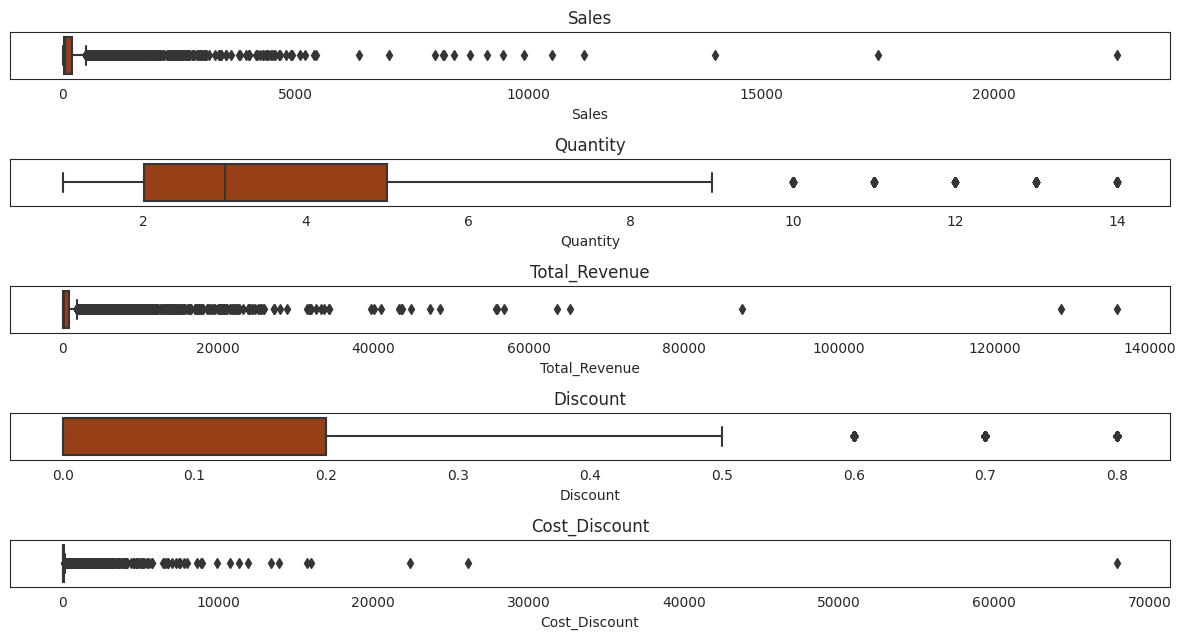

In [15]:
# Pengecekan Outliers
feature = ['Sales','Quantity','Total_Revenue','Discount','Cost_Discount']
plt.figure(figsize=(12, 6.5))

for idx, col in enumerate(feature, start=1):
    plt.subplot(5, 1, idx)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

dari boxplot diatas, akan kita bahas masing-masing pertabelnya :


*   **Sales :** dari grafik bloxplotnya,sebaran sales merepresentasikan harga produk yang dijual dan memang model pricing SaaS itu memungkinkan memasang harga produknya sevariatif itu karena biasanya SaaS jarang menaikan harga, mereka cenderung mematok harga tinggi, lalu untuk menarik customer yang beraneka ragam, mereka menggunakan diskon/promo yang relatif besar [sumber](https://taylorwells.com.au/b2b-saas-pricing-models/). Sehingga kita memutuskan untuk *tidak membuang data outliers di kolom Sales*.
*   **Quantity :** Kolom Quantity memiliki outliers diangka 10-14 dan kita menilainya wajar karena kuantiti bisa dari 0 sampai tak terhingga jadi kita memutuskan untuk *Tidak membuang Outliers Quantity*


*   **Total_Revenue :** Total_Revenue merupakan perkalian antara kolom Sales dan Quantity. Karena kita memutuskan untuk tidak membuang outliers di Sales dan Quantity maka, *Outliers di Total_Revenue tidak kita buang*
*   **Discount :** *Kita tidak membuang outliers didiskon*, alasannya Seperti penjelasan di Sales, diskon di industri SaaS variatif bahkan ada yang lebih dari 50% itu merupakan strategi pricing untuk bisa mendapatkan segmen pasar yang beragam sehingga bisa penetrasi ke berbagai segment bisnis dari Enterprise sampai SMB [sumber](https://taylorwells.com.au/b2b-saas-pricing-models/).

*   **Cost_Discount :** Cost_Discount merupakan perkalian antara Sales dan Discount. Karena kita tidak membuang outliers di kolom Sales, maka di *Cost_Discount-pun kita tidak membuang outliers*


Jadi karena kita memutuskan untuk tidak membuang semua outlier, maka konsekwensinya semua perhitungan dari **sales, Quantity, Total_Revenue, Discount, Diac Amount tidak menggunakan fungsi mean/Rata-rata karena akan membuat nilainya bias.**







**1.6. Export Data untuk membuat Dashboard Interaktif**

Export dataframe yang sudah melalui proses cleaning dan pengecekan untuk selanjutnya diolah ditableau

In [16]:
df.to_excel("Capstone Modul II : Evaluasi Penggunaan Diskon dalam Penjualan Produk SaaS dari AWS.xlsx")

_____________________________________________________________________________________

## **2. Explolatory Data Analysis**

Setelah dataset sudah dicek dan dibersihkan, tahap berikutnya adalah Exploratory Data Analysis. Yang harus kita ingat adalah semua proses di EDA ini **tidak melibatkan** fungsi agregasi **Mean** karena menurut analisa outliers, banyak data numerikal yang persebarannya diatas Kuartil 3. Jika dipaksakan, hasil mean tidak merepresentasikan sebaran data normal dan hasil analisa akan salah jalan. Kita bisa gunakan nilai **Median** yang tahan akan outliers untuk analisa-analisa berikutnya.

Untuk setiap kolom yang ada nanti akan dibandingkan dengan data **Cost_Discount.** Sebelum itu kita perlu tau sebaran nilai **Discount** yang tersebar dalam semua transaksi, bisa dijelaskan dari grafik dibawah.

### *Business Question* (1)

***Sebutkan 3 persentase diskon yang sering digunakan? Berapa prosentase transaksi yang tidak menggunakan discount?***

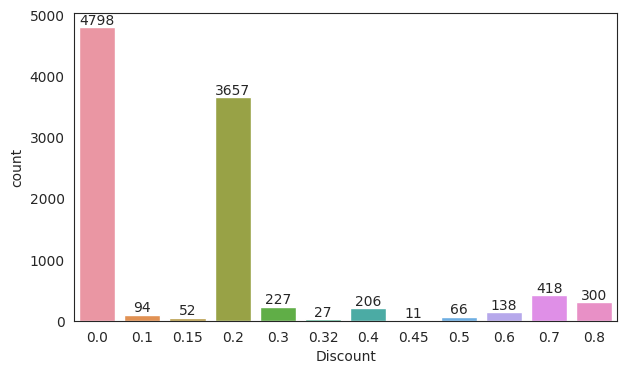

In [17]:
# Sebaran Discount
plt.figure(figsize=(7, 4))
graph = sns.countplot(x = 'Discount', data = df)
for container in graph.containers:
    graph.bar_label(container)
plt.show()

insight :

*   Dari grafik diatas, yang tertinggi adalah disc 0%, tetapi itu artinya tidak diberi diskon, Jadi kita eliminasi.
*    kita bisa simpulkan 3 jenis diskon yang sering digunakan yaitu **20%, 70%, dan 80%.**

Rekomendasi :

*   Dari grafik ternyata banyak discount di nilai 70% dan 80%. ini harus diminimalisir karena akan cukup banyak memangkas margin. tetapi Menurut sumber dari [www.kalungi.com/blog/saas-pricing-discounts](https://www.kalungi.com/blog/saas-pricing-discounts), terkadang kita juga perlu menggunakan discount besar untuk mendapatkan customer besar pertama atau saat kita akan melakukan penetrasi ke segment pasar baru. Jadi dalam kondisi tertentu, **boleh kita menggunakan discount besar tapi dengan syarat dan ketentuan yang berlaku**

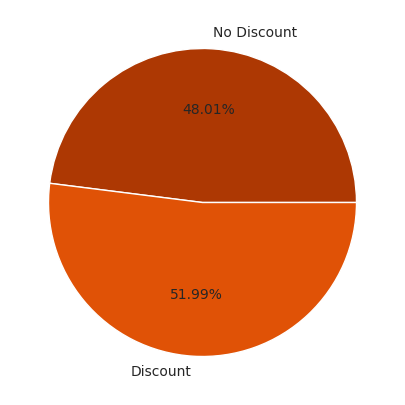

In [18]:
# Visualisasi No Discount dalam Pie Chart
Discount =[4798,
           94+52+3657+227+27+206+11+66+138+418+300] # angka didapat dari grafik
Segment=['No Discount','Discount']
plt.figure(figsize=(6,5))
plt.pie(Discount, labels = Segment,autopct='%1.2f%%')
plt.show()

insight :
*   Dari sebaran discount dan no discount, kita bisa ambil kesimpulan bahwa
 keduanya hampir sama besar, tetapi transaksi menggunakan discount sedikit lebih banyak yaitu sekitar 51.99% dan yang tidak menggunakan discount senilai **48.01%**


 Recomendasi :

*   Besarnya discount yang diberikan tentu tidak berbading lurus dengan revenue yang didapatkan karena ada variabel harga product yang variatif, tetapi itu berpengaruh langsung dengan margin perusahaan karena menambah discount artinya mengurangi keuntungan. menurut [www.statista.com/Amazon-Maintains-Lead-in-the-Cloud-Market](https://www.statista.com/chart/18819/worldwide-market-share-of-leading-cloud-infrastructure-service-providers/), AWS memang sedang menjaga keunggulan market share didunia cloud computing dalam menyambut market size yang terus berkembang seperti yang ditulis oleh *Brainy Insights* memperkirakan bahwa pasar layanan cloud senilai 621,4 miliar USD akan mencapai 2.294,3 miliar USD pada tahun 2032 [www.globenewswire.com/Cloud-Services-Market-Size-to-Surpass-USD-2694-3-Billion-Growth-by-2032/](https://www.globenewswire.com/en/news-release/2024/01/03/2803473/0/en/Cloud-Services-Market-Size-to-Surpass-USD-2694-3-Billion-Growth-by-2032-Exhibit-a-CAGR-of-15-8-Rise-in-Cloud-Based-Solutions-by-Public-Sector.html). Jadi menurut kita **harus ada angka yang jelas untuk spending discount yang diperbolehkan supaya ada keseimbangan antara mengejar market share dan profitability karena keduanya merupakan hal yang penting untuk perusahaan**




### *Business Question* (2)

***Kapan waktu terbaik kita untuk mengeluarkan diskon?***

**Day, Months, Quarter, Year**

Secara klasik, companies akan mengeluarkan promo diskon ketika transaksi mereka low disuatu waktu sehingga waktu menjadi 'Pisau Bedah' yang akan melihat dimana transaksi yang paling sedikit secara modus. Oleh karena itu, **kita akan membedah dimana distribusi transaksi menurut jumlah dibandingkan dengan Cost_Discount** yang dikeluarkan dalam periode waktu tersebut

Menurut [entrepreneur.bisnis.com/waktu-yang-tepat-untuk-promo-diskon](https://entrepreneur.bisnis.com/read/20220517/88/1533805/pebisnis-ini-lho-waktu-yang-tepat-untuk-kasih-promo-diskon), beberapa opsi waktu terbaik untuk memberikan diskon adalah dihari besar, hari spesial customer, acara khusus, selebrasi bisnis dll. Tetapi **kita tidak sepenuhnya setuju** karena jenis barang yang dijual berbeda karakternya dan target marketnyapun B2B jadi kurang cocok jika dengan pendekatan momen waktu. **Menurut kita waktu terbaik memberikan discount adalah diwaktu transaksi paling low**. mari kita mencari dari data kapan waktu terbaik itu.

In [19]:
# Day Count (kecil -> Besar)
pd.crosstab(index=df['Day'],
            columns='Count').sort_values(by='Count', ascending=True).T

Day,31,29,30,1,16,28,17,10,6,23,...,24,26,11,4,12,9,3,5,20,21
col_0,,,,,,,,,,,,,,,,,,,,,
Count,230,251,260,272,278,283,291,296,304,305,...,340,341,343,348,352,355,373,373,385,402


In [20]:
# Cost_Discount per-Day (Besar -> Kecil)
df[['Day','Cost_Discount']].groupby('Day').sum().sort_values('Cost_Discount',ascending=False).round(1).T

Day,18,8,26,24,17,28,5,3,22,27,...,13,16,7,29,21,23,10,30,31,6
Cost_Discount,119056.1,77304.5,71579.6,66337.5,62044.0,61216.4,57664.9,55418.7,54829.3,54182.6,...,43133.2,42977.0,40320.4,39982.1,38934.0,38486.8,35737.8,34779.0,28228.6,22663.8


Insight :

*   dari 2 tabel diatas, kita bisa melihat 4 transaksi paling *low* terjadi ditanggal yang berurutan yaitu **29,30,31, dan 1** dengan nilai berturut-turut **230, 251, 260, dan 272**. Frekuensi paling sedikit ada ditanggal 31 dan ini masuk akal karena tidak semua bulan ada tanggal 31.

*   Transaksi paling *high* ada ditanggal *20 dan 21*


*   Cost_Discount paling banyak terjadi ditanggal **18 dan 8** dengan nilai **119056,1 USD dan 77304,5 USD**. Artinya ada pengeluaran diskon berlebih ditanggal tersebut. Kemungkinannya bisa jadi dari diskon-diskon besar dan tidak dari diskon kecil yang frekuensinya banyak *(melihat jumlah transaksi tanggal 18 dan 8 bukan masuk dalam tanggal dengan transaksi terbanyak)*


rekomendasi :

*   sistem pembelian product oleh type customer B2B biasanya sudah direncanakan jauh-jauh hari. tetapi jika kita menyingkirkan variabel itu, **kita bisa gunakan *gimmick* promo terbatas akhir bulan *(promo berlaku ditanggal 29,30,31)* untuk membuat urgency dan mengepush payment.**  tanggal 1 better tidak ditampilkan supaya gimmick akhir bulannya tetap terjaga.

*   **Hindari membuat promo ditanggal *20 dan 21* karena trafiknya sudah tinggi.** Jikapun dilakukan hanya akan membuat profit margin mengecil dan membuat AWS rugi


*   harus **dibatasi pengeluaran discount di tanggal-tanggal yang mempunyai Cost_Discount tinggi yaitu ditanggal 18 dan 8.** bisa dengan menggunakan kuota terbatas ditanggal tersebut





In [21]:
# Months Count (kecil -> Besar)
pd.crosstab(index=df['Month'],
            columns='Count').sort_values(by='Count', ascending=True).T

Month,2,1,4,3,7,6,8,5,10,9,12,11
col_0,,,,,,,,,,,,
Count,298,387,663,683,708,709,710,750,817,1386,1421,1462


In [22]:
# Cost_Discount per-Moths (Besar -> Kecil)
df[['Month','Cost_Discount']].groupby('Month').sum().sort_values('Cost_Discount',ascending=False).round(1).T

Month,11,9,12,3,8,10,5,7,6,4,1,2
Cost_Discount,248620.3,221454.4,216661.9,160955.0,132068.5,115553.5,112331.2,111114.8,89747.8,83810.5,77789.4,23770.8


insight :

*   *Months* yang memiliki jumlah transaksi paling *low* adalah **february** yaitu **298** ,lalu berikutnya adalah **january** sebanyak **387**. kita ambil 2 bulan ini saja karena peringkat tiga terpaut cukup jauh yaitu *663*. Februari menjadi peringkat 1 menjadi masuk akal karena secara jumlah harinya, bulan februari adalah paling sedikit didalam 1 tahun, Tetapi untuk bulan januari menjadi bahan perhatian karena mempunyai 31 hari.
*   *Months* paling *high* ada di *september, November, & Desember*

*   Cost_Discount paling besar secara bulan terjadi di **November, September, dan Desember** tetapi menghasilkan konversi transaksi yang besar juga. sama-sama menduduki peringkat 1,2,3 yaitu **248620.3 USD, 221454.4 USD, dan 216661.9 USD** Tapi jika bisa didalami lagi untuk bisa reduce cost lagi lebih baik.

Recomendasi :

*   **Bulan Januari dan Februari bisa menjadi dipertimbangan untuk diberikan promo dan diskon.**

*   secara natural semakin besar kita spend untuk Cost_Discount disuatu waktu, maka akan banyak transaksi yang kita dapatkan. Tetapi bisa saja customer sebenernya tetap membeli dengan diskon yang sekarang ataupun jika dikurangi menjadi lebih kecil. **Untuk optimasi pengurangan margin dari Cost_Discount, kita bisa trial mengurangi Cost_discount sebesar yang disepakati supaya kita bisa lihat juga seberpengaruh apa pengurangan itu terhadap penurunan sales.**

In [23]:
# Quarter Count (Kecil -> Besar)
pd.crosstab(index=df['Quarter'],
            columns='count').T


Quarter,Q1,Q2,Q3,Q4
col_0,,,,
count,1368,2122,2804,3700


In [24]:
# Cost_Discount per-Quarter (Besar -> Kecil)
df[['Quarter','Cost_Discount']].groupby('Quarter').sum().sort_values('Cost_Discount',ascending=False).round(1).T

Quarter,Q4,Q3,Q2,Q1
Cost_Discount,580835.6,464637.7,285889.5,262515.3


*Quarter* lazim digunakan untuk mengevaluasi plan dalam jangka pendek. biasanya evaluasi kebijakan program dari divisi sales & marketing akan dinilai performanya dalam *Quarter*.


insight :
*   Dari Tabel dan tabel diatas, kita bisa melihat kecenderungan **kenaikan transaksi** *dari Q1 ke Q4*. paling low yaitu **Q1** ada di nilai **1368 transaksi**
*   *Gap* antara *Q1 ke Q2* dan *Q3 ke Q4 tinggi* dan yang *paling tinggi dari Q4 ke Q1 ditahun berikutnya*.

*   Secara Cost_Discount berbanding lurus apa yang dikeluarkan dan jumlah transaksi yang terjadi. yang tertinggi ada di **Q4** yaitu diangka **580835.6 USD**

recomendasi :

*   Hindari mengeluarkan diskon diakhir tahun. **lebih baik budget discount tertentu, lebih baik proporsinya dilimpahkan ke Q1.**
*   kita bisa **release promo discount lain diwaktu antara perpindahan Quarter** untuk mengurangi gap





In [25]:
# Year Count (Kecil -> Besar)
pd.crosstab(index=df['Year'],
            columns='count').T

Year,2020,2021,2022,2023
col_0,,,,
count,1993,2102,2580,3319


In [26]:
# Cost_Discount per-Year (Besar -> Kecil)
df[['Year','Cost_Discount']].groupby('Year').sum().sort_values('Cost_Discount',ascending=False).round(1).T

Year,2023,2020,2022,2021
Cost_Discount,496946.4,400691.9,369769.6,326470.2


insight :

*   Dalam pengelompokan tahun, kita bisa melihat dari Tabel bahwa jumlah transaksi terus *meningkat dari tahun ketahun* bahkan ditahun 2023 naik cukup signifikan. **Jumlah Transaksi terendah ada di tahun 2020 senilai 1993**

*   untuk Cost_discount terlihat paling besar ada ditahun 2023, itu selaras dengan jumlah transaksi yang dihadirkan ditahun tersebut. Jumlah terbesar ada di tahun 2023 senilai **496946.4 USD**

*   Yang menarik adalah diperingkat kedua diisi tahun 2020 yang notabenya secara frekuensi transaksi tidak merupakan paling rendah dalam 4 tahun terakhir. Penjelasan paling masuk akal adalah karena ditahun tersebut adalah *peak dari covid-19* sehingga sebesar itu Cost_Discount yang dikeluarkan tetapi transaksinya paling kecil di 4 tahun terakhir


action :


*   Kenaikan transaksi dari tahun ketahun memicu kenaikan jumlah sales yang diiringi kenaikan Cost_Discount juga yang berarti akan menggerus margin. Harus ada strategi yang tepat untuk pemberian diskon supaya tidak menggunakannya secara berlebihan. **Jadi menurut kita, parameter waktu dari tahun tidak perlu digunakan karena tidak mendapat temuan yang berharga**

### *Business Question* (3)

***Siapa top customer yang mempunyai Total revenue dan Spending Cost_Discount yang terbesar dan terkecil?***

**Customer**

Idealnya, Customer yang diinginkan kita sebagai penyedia produk SaaS adalah yang mempunyai **Good Sales** dan **Good Quantity.** Tapi pada kenyataannya tidak seperti itu. Ada yang Good Sales tapi Bad Quantity, ada yang sebaliknya Bad Sales tapi Good Quantity dan yang terakhir yang paling tidak kita inginkan, Bad Sales dan Bad Quantity.

Sekarang kita akan membedah Customer sering/jarang diberi discount, berapa kontribusi Total_Revenue dan seberapa besar Cost_Discount yang dikeluarkan perusahaan.

In [27]:
# Cost_Discount per-Customer (Besar -> Kecil)
cust_disc_max = df[['Customer','Cost_Discount']].groupby('Customer').sum().sort_values('Cost_Discount',ascending=False).round(2).T

# Total_Revenue per-Customer (Besar -> Kecil)
cust_sales_max = df[['Customer','Total_Revenue']].groupby('Customer').sum().sort_values('Total_Revenue',ascending=False).round(2).T

display(cust_sales_max,cust_disc_max)

Customer,Valero Energy,Anthem,Tyson Foods,Bank of America Corp.,Allianz,Lowes,BNP Paribas,AmerisourceBergen,Morgan Stanley,Lukoil,...,Exxon Mobil,Goldman Sachs Group,Banco Santander,Petrobras,Tesco,Citigroup,General Electric,Safeway,Berkshire Hathaway,Gazprom
Total_Revenue,295566.45,283233.05,235455.84,232894.26,207084.97,206148.95,200149.49,198512.38,194604.8,188073.18,...,50627.49,47730.09,46807.55,45219.52,40330.49,38613.63,36691.65,32679.87,28226.89,20808.96


Customer,Anthem,Morgan Stanley,Allstate,Nissan Motor,Tyson Foods,Bosch,BNP Paribas,HSBC Holdings,Ford Motor,BMW,...,Abbott Laboratories,General Electric,Procter & Gamble,News Corp.,Cigna,Gazprom,Goldman Sachs Group,Tesco,Safeway,Berkshire Hathaway
Cost_Discount,79493.22,45086.46,43625.78,41329.11,37865.48,36154.41,30413.08,30120.37,29892.84,29468.14,...,5440.02,4597.6,3984.77,3658.23,3584.7,3534.01,3491.22,3476.86,3468.82,3118.72


Insight :

*   Dari tabel diatas, kita bisa melihat 3 besar **Total_Revenue dari Valero Energy (295566.45 USD), Anthem (283233 USD), & Tyson Foods (235455.84 USD)**
*   3 besar untuk Cost_Discount berasal dari **Anthem (79493.22 USD), Morgan Stanley (45086.46 USD), & Allstate (43625.78 USD)**

Rekomendasi :

*   Jika ada customer yang memiliki **high** Total_Revenue dan **high** Cost_Discount Seperti **Anthem**, maka masih dalam **consider untuk mengevaluasi** Discount karena masih dalam kewajaran.
*   Jika ada customer yang memiliki **high** Total_Revenue dan **low** Cost_Discount Seperti **Valero Energy & Tyson Foods**, kita happy, tidak perlu dilakukan apa-apa, atau justru **bisa kita berikan diskon untuk pembelian berikutnya supaya tetap loyal**

*   Jika ada customer yang memiliki **Low** Total_Revenue dan **High** Cost_Discount Seperti **Morgan Stanley & Allstate**, perlu **dievaluasi, apakah mau dikurangi Cost_Discount-nya atau distimulus untuk membeli lebih banyak.**

*   Untuk customer yang **Low** Total_Revenue dan **low** Cost_Discount seperti **Safeway dan Berkshire Hathaway** bisa **consider untuk diberikan promo khusus untuk menaikan sales dan Quantity penjualan seperti program loyalti.**


### *Business Question* (4)

***Apa Product,Industry dan Segment yang berkontribusi banyak dan sedikit pada spending Cost_Discount?***

Product yang bagus adalah product yang penjualannya tinggi dan Quantity-nya banyak. Tetapi pada kenyataannya sulit dilakukan karena demografi customer yang berbeda sehingga harus ada adjsutment maka dari itu digunakanlah discount. Jika Total revenue dikutip dari [accurate.id](https://accurate.id/akuntansi/revenue-adalah/), merupakan hasil perkalian Sales dan Quantity :

                                                Total_Revenue = Sales x Quantity

Maka Total revenue bisa jadi parameter untuk melihat sejauh mana perusahaan spend cost untuk mensubsidi pemberian discount.

**Product**

In [28]:
# Cost_Discount per-Product (Besar -> Kecil)
product_disc_max = df[['Product','Cost_Discount']].groupby('Product').sum().sort_values('Cost_Discount',ascending=False).round(2).T

# Total_Revenue per-Product (Besar -> Kecil)
product_sales_max = df[['Product','Total_Revenue']].groupby('Product').sum().sort_values('Total_Revenue',ascending=False).round(2).T

display(product_sales_max,product_disc_max)

Product,ContactMatcher,FinanceHub,Site Analytics,Marketing Suite - Gold,Big Ol Database,Data Smasher,Alchemy,Marketing Suite,Support,OneView,SaaS Connector Pack,ChatBot Plugin,SaaS Connector Pack - Gold,Storage
Total_Revenue,2157968.46,1733392.72,1628827.96,1099229.48,914789.88,878922.52,657721.17,597826.12,590640.24,547368.45,454116.81,136021.11,74179.35,17057.79


Product,ContactMatcher,FinanceHub,Site Analytics,Big Ol Database,Marketing Suite,Alchemy,Marketing Suite - Gold,Data Smasher,SaaS Connector Pack,Support,OneView,ChatBot Plugin,SaaS Connector Pack - Gold,Storage
Cost_Discount,460298.44,242488.33,241146.74,223856.15,111063.29,73030.93,60473.5,50477.69,40297.19,39044.56,35081.86,9240.0,5867.46,1512.01


insight :

*   3 teratas dari sisi **Total_Revenue dan Cost_Discount** diisi oleh produk yang sama yaitu **ContactMatcher, FinanceHub, Site Analytics**
*   3 terbawah dari sisi **Total_Revenue dan Cost_Discount** diisi oleh produk yang sama juga yaitu **hatBot Plugin, SaaS Connector Pack - Gold, dan Storage**

Rekomendasi :

*   **Marketing Suite - Gold** berada pada peringkat 4 di Total_Revenue, tetapi di Cost_Discountnya berada diperingkat 7. Artinya ini product bagus. **Marketing Suite - Gold kita merekomendasikan untuk dibundling dengan product lain yang memiliki sales kecil**
*   **SaaS Connector Pack** bearada diperingkat 4 terbawah di Total_Revenue tetapi untuk Cost_Discountnya berada di peringkat 6 terbawah. Artinya ini product kurang bagus, karena spendingnya relatif lebih besar daripada sales **SaaS Connector Pack kita rekomendasikan untuk dibundling dengan product yang memiliki sales tinggi** supaya mengangkat performanya dan reduce Cost_Discount





**Industry**

In [29]:
# Cost_Discount per-Industry (Besar -> Kecil)
industry_disc_max = df[['Industry','Cost_Discount']].groupby('Industry').sum().sort_values('Industry',ascending=False).round(2).T

# Total_Revenue per-Industry (Besar -> Kecil)
industry_sales_max = df[['Industry','Total_Revenue']].groupby('Industry').sum().sort_values('Industry',ascending=False).round(2).T

display(industry_sales_max,industry_disc_max)

Industry,Transportation,Tech,Retail,Misc,Manufacturing,Healthcare,Finance,Energy,Consumer Products,Communications
Total_Revenue,499334.75,1263390.0,1143277.1,180184.53,1387801.64,1384935.65,2386784.91,1565656.4,1105021.4,571675.7


Industry,Transportation,Tech,Retail,Misc,Manufacturing,Healthcare,Finance,Energy,Consumer Products,Communications
Cost_Discount,84062.99,201345.3,128066.45,9994.65,189718.85,231628.98,349441.11,191148.74,130748.32,77722.73


insight :

*   Dari tabel diatas, kita bisa melihat **Total_Revenue** paling banyak dari Industry **Transportation, Tech, Retail** dengan nilai berturut-turut **499334.75 USD, 1263390.0 USD, 1143277.1 USD**
*   **Cost_Discount** dengan urutan yang sama yaitu **Transportation, Tech, Retail** dengan nilai berturut-turut **84062.99 USD, 201345.3 USD, 128066.45 USD**

action :

*   Di kolom **Industry** memiliki hubungan korespondensi peringkat yang sama antara **Total_Revenue dan Cost_Discount** sehingga **tidak perlu ada penggolongan diskon berdasarkan Industry.**

**Segment**

In [30]:
# Cost_Discount per-Segment (Besar -> Kecil)
segment_disc_max = df[['Segment','Cost_Discount']].groupby('Segment').sum().sort_values('Cost_Discount',ascending=False).round(2).T

# Total_Revenue per-Segment (Besar -> Kecil)
segment_sales_max = df[['Segment','Total_Revenue']].groupby('Segment').sum().sort_values('Total_Revenue',ascending=False).round(2).T

display(segment_sales_max,segment_disc_max)

Segment,SMB,Strategic,Enterprise
Total_Revenue,5819347.4,3516107.67,2152607.0


Segment,SMB,Strategic,Enterprise
Cost_Discount,820255.74,443423.85,330198.54


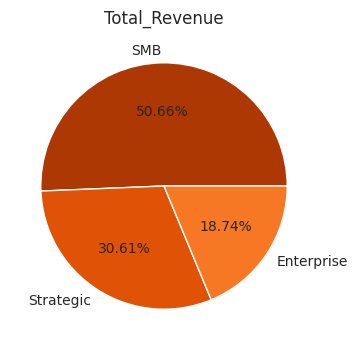

In [31]:
# Visualisasi Total_Revenue Segment dalam Pie Chart
Total_Revenue =[5819347.4,3516107.67,2152607.0]
Segment=['SMB','Strategic','Enterprise']
plt.figure(figsize=(5,4))
plt.pie(Total_Revenue, labels = Segment,autopct='%1.2f%%')
plt.title('Total_Revenue')
plt.show()

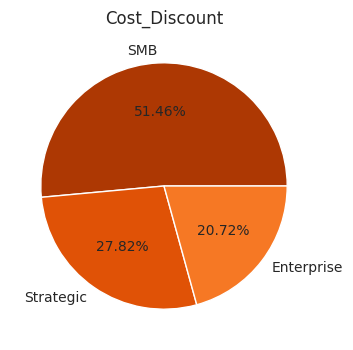

In [32]:
# Visualisasi Cost_Discount Segment dalam Pie Chart
Cost_Discount =[820255.74,443423.85,330198.54]
Segment=['SMB','Strategic','Enterprise']
plt.figure(figsize=(5,4))
plt.pie(Cost_Discount, labels = Segment,autopct='%1.2f%%')
plt.title('Cost_Discount')
plt.show()

insight :


*   **Total_Revenue dan Cost_Discount** dari segment paling besar berturut-turut adalah **SMB,Strategic, dan Enterprise**. Untuk Total_Revenue nilainya berturut-turut adalah **5819347.4,3516107.67,2152607.0 (dalam USD)**. Sedangkan untuk Cost_Discount nilainya secara berturut-turut adalah **820255.74,443423.85,330198.54 (Dalam USD)**

Rekomendasi :

*   Jika kita melihat dari diagram pie diatas, kita melihat segment **Strategic** punya perbandingan Cost_Discount dan Total_Revenue yang relatif lebih kecil daripada 2 yang lain. Rekomendasi kita, bisa jadi bahan pertimbangan untuk **fokus budget discount lebih ke market middle (Strategic)dan untuk enterprise bisa kita kurangi**  



### **Dashboard Interactive**

Berikut link Tableau Public untuk mengakses Dashboard Interactive ::

https://public.tableau.com/views/EDA-AWS-SaaS-Discount/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link